In [9]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
# load data
data = pd.read_csv("train.csv")
X = data[["GrLivArea", "BedroomAbvGr", "FullBath"]]  # Square footage, bedrooms, bathrooms
y = data["SalePrice"]   


In [3]:
# Handle missing values
X = X.fillna(X.mean(numeric_only=True))
y = y.fillna(y.median())


In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained successfully")


Model trained successfully


In [6]:
#evaluate model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.4f}")

Model Coefficients: [   104.02630701 -26655.16535734  30014.32410896]
Intercept: 52261.74862694461
RMSE: 52975.72
R^2: 0.6341


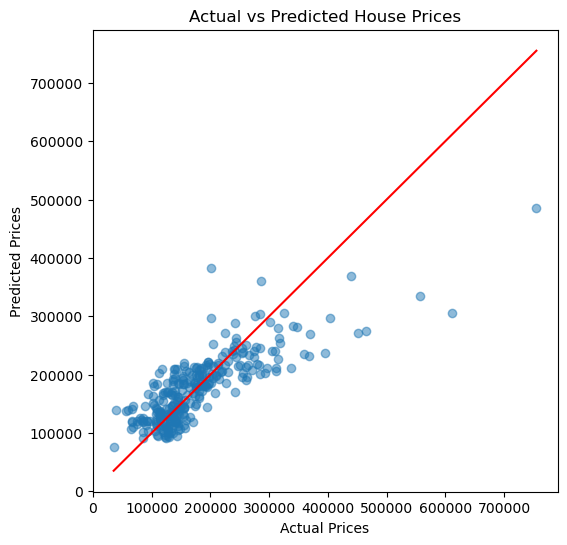

In [7]:
#plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.show()


In [11]:
#save the model
joblib.dump(model, "linear_model.joblib")
print("Model saved successfully")

Model saved successfully
